# Loan Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import nb_black

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv("train_loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<IPython.core.display.Javascript object>

In [3]:
pd.crosstab(df["Credit_History"], df["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<IPython.core.display.Javascript object>

In [4]:
pd.crosstab(df["Education"], df["Loan_Status"])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<IPython.core.display.Javascript object>

In [5]:
pd.crosstab(df["Self_Employed"], df["Loan_Status"])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<IPython.core.display.Javascript object>

In [7]:
df.shape

(614, 13)

<IPython.core.display.Javascript object>

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

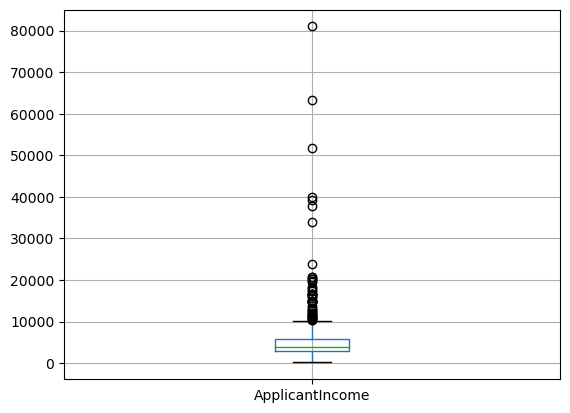

<IPython.core.display.Javascript object>

In [9]:
df.boxplot(column="ApplicantIncome")

<AxesSubplot:>

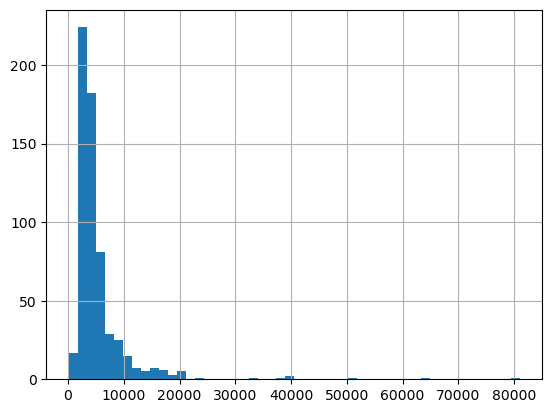

<IPython.core.display.Javascript object>

In [10]:
df["ApplicantIncome"].hist(bins=50)

<AxesSubplot:>

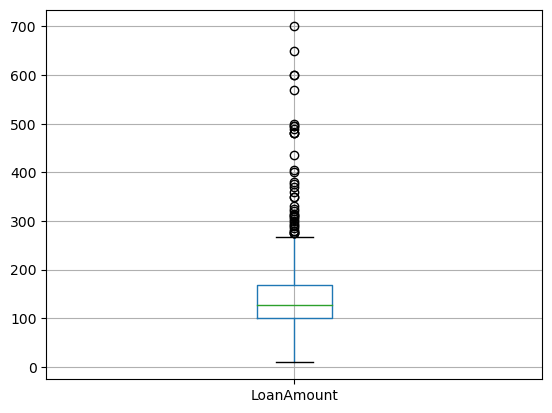

<IPython.core.display.Javascript object>

In [11]:
df.boxplot(column=["LoanAmount"])

<AxesSubplot:>

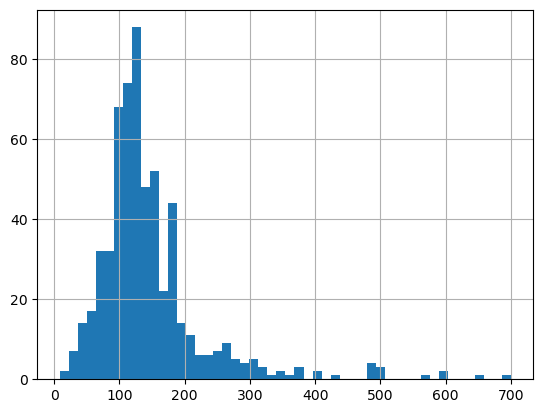

<IPython.core.display.Javascript object>

In [12]:
df["LoanAmount"].hist(bins=50)

Filling the null values

In [13]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(), inplace=True)

<IPython.core.display.Javascript object>

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

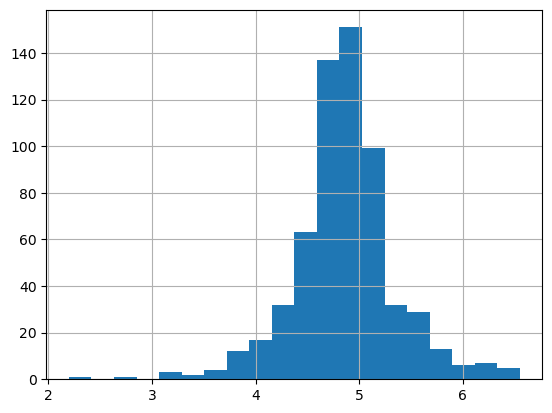

<IPython.core.display.Javascript object>

In [15]:
df["LoanAmount"] = np.log(df["LoanAmount"])
df["LoanAmount"].hist(bins=20)

In [16]:
df["totalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["totalIncome"] = np.log(df["totalIncome"])

<IPython.core.display.Javascript object>

In [17]:
df["totalIncome"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: totalIncome
Non-Null Count  Dtype  
--------------  -----  
614 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


<IPython.core.display.Javascript object>

<AxesSubplot:>

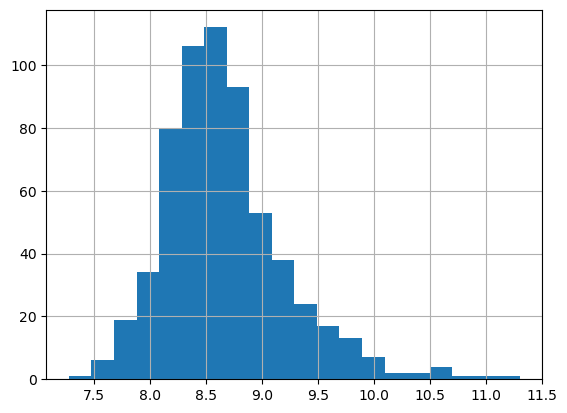

<IPython.core.display.Javascript object>

In [18]:
df["totalIncome"].hist(bins=20)

In [19]:
df = df.drop(columns=["Loan_ID"])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome
0,Male,No,0,Graduate,No,5849,0.0,4.986426,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,Y,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,4.262680,360.0,1.0,Rural,Y,7.972466
610,Male,Yes,3+,Graduate,No,4106,0.0,3.688879,180.0,1.0,Rural,Y,8.320205
611,Male,Yes,1,Graduate,No,8072,240.0,5.533389,360.0,1.0,Urban,Y,9.025456
612,Male,Yes,2,Graduate,No,7583,0.0,5.231109,360.0,1.0,Urban,Y,8.933664


<IPython.core.display.Javascript object>

In [20]:
cols = [
    "Gender",
    "Dependents",
    "Married",
    "Education",
    "Self_Employed",
    "Property_Area",
    "Loan_Status",
]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for x in cols:
    df[x] = le.fit_transform(df[x])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome
0,1,0,0,0,0,5849,0.0,4.986426,360.0,1.0,2,1,8.674026
1,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,0,0,8.714568
2,1,1,0,0,1,3000,0.0,4.189655,360.0,1.0,2,1,8.006368
3,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,2,1,8.505323
4,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,2,1,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,4.262680,360.0,1.0,0,1,7.972466
610,1,1,3,0,0,4106,0.0,3.688879,180.0,1.0,0,1,8.320205
611,1,1,1,0,0,8072,240.0,5.533389,360.0,1.0,2,1,9.025456
612,1,1,2,0,0,7583,0.0,5.231109,360.0,1.0,2,1,8.933664


<IPython.core.display.Javascript object>

In [21]:
X = df.drop(columns=["Loan_Status"])

<IPython.core.display.Javascript object>

In [22]:
y = df[["Loan_Status"]]
y = y.values.ravel()

<IPython.core.display.Javascript object>

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<IPython.core.display.Javascript object>

In [24]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

<IPython.core.display.Javascript object>

In [25]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="entropy", random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<IPython.core.display.Javascript object>

In [26]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

<IPython.core.display.Javascript object>

In [27]:
from sklearn import metrics

print(
    "The Accuracy gained by Decision Treee is:", metrics.accuracy_score(y_pred, y_test)
)

The Accuracy gained by Decision Treee is: 0.7723577235772358


<IPython.core.display.Javascript object>

In [28]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

<IPython.core.display.Javascript object>

In [29]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred2 = nb.predict(X_test)
print("The Accuracy gained by Naive Bayes is:", metrics.accuracy_score(y_pred2, y_test))

The Accuracy gained by Naive Bayes is: 0.8455284552845529


<IPython.core.display.Javascript object>

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred3 = lr.predict(X_test)

<IPython.core.display.Javascript object>

In [31]:
metrics.accuracy_score(y_test, y_pred3)

0.8373983739837398

<IPython.core.display.Javascript object>

In [32]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred4 = svm.predict(X_test)

<IPython.core.display.Javascript object>

In [33]:
print(
    "the accuracy gained using Support Vector Machine is :",
    metrics.accuracy_score(y_pred4, y_test),
)

the accuracy gained using Support Vector Machine is : 0.8048780487804879


<IPython.core.display.Javascript object>

In [34]:
from sklearn.ensemble import RandomForestClassifier

ref = RandomForestClassifier()
ref.fit(X_train, y_train)
yik = ref.predict(X_test)

<IPython.core.display.Javascript object>

In [35]:
metrics.accuracy_score(yik, y_test)

0.7723577235772358

<IPython.core.display.Javascript object>

# Predictions are done
## We will be using Naive bayes 

In [36]:
df1 = pd.read_csv("test_loan.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


<IPython.core.display.Javascript object>

In [37]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


<IPython.core.display.Javascript object>

In [38]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<IPython.core.display.Javascript object>

In [39]:
df1["Gender"].fillna(df1["Gender"].mode()[0], inplace=True)
df1["Dependents"].fillna(df1["Dependents"].mode()[0], inplace=True)
df1["Self_Employed"].fillna(df1["Self_Employed"].mode()[0], inplace=True)

<IPython.core.display.Javascript object>

In [40]:
df1["LoanAmount"].fillna(df1["LoanAmount"].mean(), inplace=True)
df1["Loan_Amount_Term"].fillna(df1["Loan_Amount_Term"].mean(), inplace=True)
df1["ApplicantIncome"].fillna(df1["ApplicantIncome"].mean(), inplace=True)
df1["CoapplicantIncome"].fillna(df1["CoapplicantIncome"].mean(), inplace=True)
df1["Credit_History"].fillna(df1["Credit_History"].mean(), inplace=True)

<IPython.core.display.Javascript object>

In [41]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

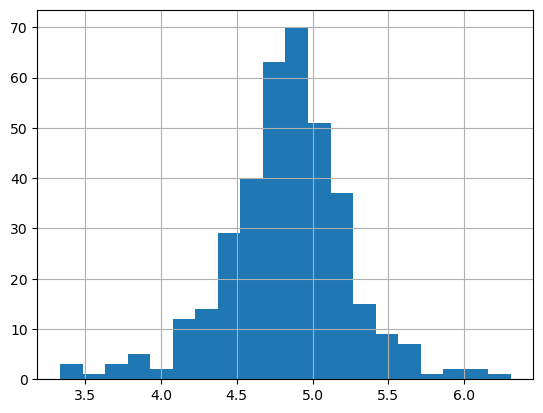

<IPython.core.display.Javascript object>

In [42]:
df1["LoanAmount"] = np.log(df1["LoanAmount"])
df1["LoanAmount"].hist(bins=20)

<AxesSubplot:>

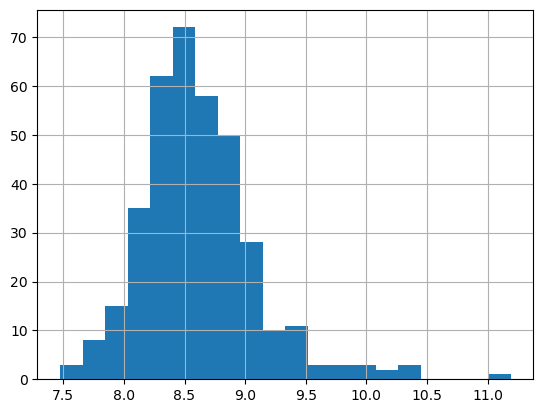

<IPython.core.display.Javascript object>

In [43]:
df1["TotalIncome"] = df1["ApplicantIncome"] + df1["CoapplicantIncome"]
df1["TotalIncome"] = np.log(df1["TotalIncome"])
df1["TotalIncome"].hist(bins=20)

In [44]:
df2 = df1.copy()
df1 = df1.drop(columns=["Loan_ID"])

<IPython.core.display.Javascript object>

In [45]:
li = ["Gender", "Dependents", "Married", "Education", "Self_Employed", "Property_Area"]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for x in li:
    df1[x] = le.fit_transform(df1[x])
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,1,0,0,0,5720,0,4.700480,360.0,1.000000,2,8.651724
1,1,1,1,0,0,3076,1500,4.836282,360.0,1.000000,2,8.428581
2,1,1,2,0,0,5000,1800,5.337538,360.0,1.000000,2,8.824678
3,1,1,2,0,0,2340,2546,4.605170,360.0,0.825444,2,8.494129
4,1,0,0,1,0,3276,0,4.356709,360.0,1.000000,2,8.094378
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,4.727388,360.0,1.000000,2,8.663196
363,1,1,0,0,0,4158,709,4.744932,360.0,1.000000,2,8.490233
364,1,0,0,0,0,3250,1993,4.836282,360.0,0.825444,1,8.564649
365,1,1,0,0,0,5000,2393,5.062595,360.0,1.000000,0,8.908289


<IPython.core.display.Javascript object>

In [46]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df1 = ss.fit_transform(df1)

<IPython.core.display.Javascript object>

In [47]:
finpred = nb.predict(df1)
finpred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

<IPython.core.display.Javascript object>

In [48]:
endres = pd.DataFrame(finpred)
endres.index.name = "Index"

<IPython.core.display.Javascript object>

In [49]:
endres = endres.rename(columns={0: "Loan_Status"})
endres

,Loan_Status
Index,
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1


<IPython.core.display.Javascript object>

In [50]:
df2.index.name = "Index"
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
Index,,,,,,,,,,,,,
0,LP001015,Male,Yes,0,Graduate,No,5720,0,4.700480,360.0,1.000000,Urban,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,4.836282,360.0,1.000000,Urban,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,5.337538,360.0,1.000000,Urban,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,4.605170,360.0,0.825444,Urban,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,4.356709,360.0,1.000000,Urban,8.094378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,4.727388,360.0,1.000000,Urban,8.663196
363,LP002975,Male,Yes,0,Graduate,No,4158,709,4.744932,360.0,1.000000,Urban,8.490233
364,LP002980,Male,No,0,Graduate,No,3250,1993,4.836282,360.0,0.825444,Semiurban,8.564649


<IPython.core.display.Javascript object>

In [51]:
df2 = df2.merge(endres, on="Index")

<IPython.core.display.Javascript object>

In [52]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
Index,,,,,,,,,,,,,,
0,LP001015,Male,Yes,0,Graduate,No,5720,0,4.700480,360.0,1.000000,Urban,8.651724,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,4.836282,360.0,1.000000,Urban,8.428581,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,5.337538,360.0,1.000000,Urban,8.824678,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,4.605170,360.0,0.825444,Urban,8.494129,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,4.356709,360.0,1.000000,Urban,8.094378,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,4.727388,360.0,1.000000,Urban,8.663196,1
363,LP002975,Male,Yes,0,Graduate,No,4158,709,4.744932,360.0,1.000000,Urban,8.490233,1
364,LP002980,Male,No,0,Graduate,No,3250,1993,4.836282,360.0,0.825444,Semiurban,8.564649,1


<IPython.core.display.Javascript object>

In [53]:
df2["Loan_Status"] = df2["Loan_Status"].map({1: "YES", 0: "NO"})
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
Index,,,,,,,,,,,,,,
0,LP001015,Male,Yes,0,Graduate,No,5720,0,4.700480,360.0,1.000000,Urban,8.651724,YES
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,4.836282,360.0,1.000000,Urban,8.428581,YES
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,5.337538,360.0,1.000000,Urban,8.824678,YES
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,4.605170,360.0,0.825444,Urban,8.494129,YES
4,LP001051,Male,No,0,Not Graduate,No,3276,0,4.356709,360.0,1.000000,Urban,8.094378,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,4.727388,360.0,1.000000,Urban,8.663196,YES
363,LP002975,Male,Yes,0,Graduate,No,4158,709,4.744932,360.0,1.000000,Urban,8.490233,YES
364,LP002980,Male,No,0,Graduate,No,3250,1993,4.836282,360.0,0.825444,Semiurban,8.564649,YES


<IPython.core.display.Javascript object>

In [54]:
id = input("Enter the Loan_ID to know the Loan_Status :")
b = df2.loc[df2["Loan_ID"] == id, "Loan_Status"].astype(str)
if b.empty:
    print("Loan ID not found")
else:
    status = b.iloc[0]
    print(f"The loan status for ID {id} is: {status}")
    if status == "YES":
        print("You are ELIGIBLE for loan!")
    else:
        print("Sorry, you are NOT ELIGIBLE for loan.")

Enter the Loan_ID to know the Loan_Status :LP002989
The loan status for ID LP002989 is: YES
You are ELIGIBLE for loan!


<IPython.core.display.Javascript object>